In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt


In [4]:
#import of data

#import of SP500 data
df_sp500 = pd.read_excel(r"/Users/charlescetta/PycharmProjects/FIN_42330_Group_Proj/Data/S&P500_stock_price_index.xlsx")
print(df_sp500.head())

#import of Barclays LBUSTRUU - Aggregate Bond Index
df_bi = pd.read_excel(r"/Users/charlescetta/PycharmProjects/FIN_42330_Group_Proj/Data/US_Aggregate_bond_price_index.xlsx")
print(df_bi.head())

#import of risk free rate
df_rf = pd.read_excel(r"/Users/charlescetta/PycharmProjects/FIN_42330_Group_Proj/Data/Risk-free_rate_of_return.xlsx")
print(df_rf.head())

#indexing
df_sp500['Dates'] = pd.to_datetime(df_sp500['Dates'])
df_bi['Dates']    = pd.to_datetime(df_bi['Dates'])
df_rf['Date']    = pd.to_datetime(df_rf['Date'])

df_sp500 = df_sp500.set_index('Dates').sort_index()
df_bi    = df_bi.set_index('Dates').sort_index()
df_rf    = df_rf.set_index('Date').sort_index()


       Dates  stock index price 
0 1979-12-31              107.94
1 1980-01-31              114.16
2 1980-02-29              113.66
3 1980-03-31              102.09
4 1980-04-30              106.29
       Dates  Bond index price 
0 1979-12-31             123.10
1 1980-01-31             119.35
2 1980-02-29             112.29
3 1980-03-31             112.38
4 1980-04-30             125.12
        Date  Risk free rate of return 
0 1980-01-31                     0.0080
1 1980-02-29                     0.0089
2 1980-03-31                     0.0121
3 1980-04-30                     0.0126
4 1980-05-30                     0.0081


In [5]:
#rate of return

sp500_col = df_sp500.columns[0]
bi_col = df_bi.columns[0]

ror_sp500 = df_sp500[sp500_col].pct_change().dropna()
ror_bi    = df_bi[bi_col].pct_change().dropna()

ror_sp500.name = "RoR_SP500"
ror_bi.name    = "RoR_Bond"

print(ror_sp500.head())
print(ror_bi.head())


print(ror_bi.head())

Dates
1980-01-31    0.057625
1980-02-29   -0.004380
1980-03-31   -0.101795
1980-04-30    0.041140
1980-05-30    0.046571
Name: RoR_SP500, dtype: float64
Dates
1980-01-31   -0.030463
1980-02-29   -0.059154
1980-03-31    0.000801
1980-04-30    0.113365
1980-05-30    0.047155
Name: RoR_Bond, dtype: float64
Dates
1980-01-31   -0.030463
1980-02-29   -0.059154
1980-03-31    0.000801
1980-04-30    0.113365
1980-05-30    0.047155
Name: RoR_Bond, dtype: float64


In [6]:
#index data on the same date

rf_indexed = df_rf.reindex(df_sp500.index).ffill()
bi_indexed = df_bi.reindex(df_sp500.index).ffill()
rf_col = df_rf.columns[0]
rf = rf_indexed[rf_col]
rf.name = "Rf"

In [7]:
#alignment of rf to ror
rf_aligned = rf.reindex(ror_sp500.index).ffill()

excess_sp500 = ror_sp500 - rf_aligned
excess_bi    = ror_bi.reindex(ror_sp500.index) - rf_aligned

excess_sp500.name = "Excess_SP500"
excess_bi.name    = "Excess_Bond"

print(excess_sp500.head())
print(excess_bi.head())

Dates
1980-01-31    0.049625
1980-02-29   -0.013280
1980-03-31   -0.113895
1980-04-30    0.028540
1980-05-30    0.038471
Name: Excess_SP500, dtype: float64
Dates
1980-01-31   -0.038463
1980-02-29   -0.068054
1980-03-31   -0.011299
1980-04-30    0.100765
1980-05-30    0.039055
Name: Excess_Bond, dtype: float64


In [8]:
#summary statistics
#Annualized mean, Annualized volatility, Annualized Sharpe, Skewness, Kurtosis

def sum_statistics(any_pd_series, periods):

    #simple return excess
    return_excess_mean = any_pd_series.mean()
    #simple stdev
    stdev_excess = any_pd_series.std(ddof=1)

    #annualized mean (multiplied by periods == 12)
    mean_ann = return_excess_mean*periods
    #annualized stdev
    stdev_ann = stdev_excess* np.sqrt(periods)

    #annualized sharpe ratio
    sharpi_annualized = mean_ann / stdev_ann

    #kurtosis
    kurtosi = any_pd_series.kurtosis()

    #skewness
    skewi = any_pd_series.skew()

    stats = pd.Series({
        "Return Excess Mean": return_excess_mean.round(4),
        "Standard Deviation Excess": stdev_excess.round(4),
        "Mean Annual": mean_ann.round(4),
        "Standard Deviation": stdev_ann.round(4),
        "Sharpe Ratio Annualized": sharpi_annualized.round(4),
        "Kurtosis": kurtosi.round(4),
        "Skewness": skewi.round(4)
    })
    return stats


In [9]:
#for display
stats_sp500 = sum_statistics(excess_sp500, periods=12)
stats_bond = sum_statistics(excess_bi, periods =12)

summary_table = pd.DataFrame({
    "SP500 Excess Returns": stats_sp500,
    "Bond Excess Returns": stats_bond
})

In [10]:
print("\nResults:")
display(
    summary_table.style.format("{:.4f}").set_caption("Summary Statistics of Monthly Excess Returns (ann.)")
)


Results:


,SP500 Excess Returns,Bond Excess Returns
Return Excess Mean,0.0049,0.0023
Standard Deviation Excess,0.0442,0.0154
Mean Annual,0.0589,0.0275
Standard Deviation,0.1530,0.0534
Sharpe Ratio Annualized,0.3852,0.5157
Kurtosis,1.8111,5.0599
Skewness,-0.5937,0.3197


In [308]:
#Explanation of the Results - TO DO



In [11]:
#task 2
def split(splitter):
    #split the series into two periods
    insample_half = splitter.loc["1980-01-01":"2000-12-31"]
    outofsample_half = splitter.loc["2001-01-01":"2023-12-31"]

    return insample_half, outofsample_half

In [12]:
#check if splitter works correctly

#for sp500 => var: insample_sundp500 oos_sundp500

insample_sundp500, oos_sundp500 = split(excess_sp500)

#for Bloomberg Barclays U.S. Aggregate Bond Index (LBUSTRUU) => var: insample_bondi, oos_bondi

insample_bondi, oos_bondi = split(excess_bi)


In [13]:
#Using a rolling window estimation approach, generate a time-series of monthly outof-sample constant expected (mean) excess return forecasts (call it the benchmark forecast) for each of the two asset classes. Write a function to do this computation

#forecasting via rolling window
def the_roll_window(any_series, my_splitfunction):

    #split the series with splitter function
    insample_period, outofsample = my_splitfunction(any_series)

    #thewindow
    window = len(insample_period)

    #check if the full series is still there
    full_series = pd.concat([insample_period, outofsample])

    #Rolling window of mean based on past data only
    rolling_mean = full_series.rolling(window=window).mean().shift(1)

    #Keep only outofsample only as forecasts
    forecast = rolling_mean.loc[outofsample.index]
    forecast.name = "Benchmark Mean Forecast"

    return forecast


In [14]:
benchmark_forecast_sp500= the_roll_window(excess_sp500,split)

benchmark_forecast_bonds= the_roll_window(excess_sp500,split)

print(benchmark_forecast_sp500)

Dates
2001-01-31    0.005411
2001-02-28    0.005330
2001-03-30    0.005002
2001-04-30    0.005182
2001-05-31    0.005358
                ...   
2023-08-31    0.006332
2023-09-29    0.006230
2023-10-31    0.006462
2023-11-30    0.006018
2023-12-29    0.006133
Name: Benchmark Mean Forecast, Length: 276, dtype: float64


In [15]:
#Task 3

le_path_predict = r"/Users/charlescetta/PycharmProjects/FIN_42330_Group_Proj/Data/PredictorData2023.xlsx"

#Import data file - read monthly
predictors = pd.read_excel(le_path_predict, sheet_name="Monthly")

#Conversion from year date with time index (to month end) yyyymm -> datetime index (month end)
predictors["yyyymm"] = predictors["yyyymm"].astype(str)
predictors.index = pd.to_datetime(predictors["yyyymm"], format="%Y%m") + pd.offsets.MonthEnd(0)

#First column drop
predictors = predictors.drop(columns=["yyyymm"]).sort_index()
predictors = predictors.apply(pd.to_numeric, errors="coerce")

print(predictors.shape)
print(predictors.index.min(), predictors.index.max())
print(predictors.columns.tolist()[:15])
print(predictors.head())



(1836, 56)
1871-01-31 00:00:00 2023-12-31 00:00:00
['price', 'd12', 'e12', 'ret', 'retx', 'AAA', 'BAA', 'lty', 'ltr', 'corpr', 'tbl', 'Rfree', 'd/p', 'd/y', 'e/p']
            price   d12  e12  ret  retx  AAA  BAA  lty  ltr  corpr  ...  ygap  \
yyyymm                                                              ...         
1871-01-31   4.44  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN    NaN  ...   NaN   
1871-02-28   4.50  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN    NaN  ...   NaN   
1871-03-31   4.61  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN    NaN  ...   NaN   
1871-04-30   4.74  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN    NaN  ...   NaN   
1871-05-31   4.86  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN    NaN  ...   NaN   

            rdsp  rsvix  gpce  gip  tchi  house  avgcor  shtint  disag  
yyyymm                                                                  
1871-01-31   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  
1871-02-28   NaN    NaN   NaN  NaN   NaN    NaN  

/Users/charlescetta/PycharmProjects/FIN_42330_Group_Proj/.venv/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [16]:
#pick the values - but there is only for chosen_ident values in the excel

chosen_ident = ["Rfree","d/p", "d/y", "e/p", "d/e"]
#the 5 predictors
maroonno5 = predictors[chosen_ident].copy()

maroonno5 = maroonno5.reindex(excess_sp500.index).apply(pd.to_numeric, errors="coerce")


In [17]:
#forecast for SP500 and Bondindex

forecast_sp500 = the_roll_window(excess_sp500, split)
forecast_bond  = the_roll_window(excess_bi, split)

#Display of results
display(pd.DataFrame({"SP500 Benchmark Forecast": forecast_sp500,"Bond Benchmark Forecast": forecast_bond}).head(12).style.format("{:.6f}"))



,SP500 Benchmark Forecast,Bond Benchmark Forecast
Dates,,
2001-01-31 00:00:00,0.005411,0.002698
2001-02-28 00:00:00,0.005330,0.002894
2001-03-30 00:00:00,0.005002,0.003184
2001-04-30 00:00:00,0.005182,0.003232
2001-05-31 00:00:00,0.005358,0.002800
2001-06-29 00:00:00,0.005213,0.002656
2001-07-31 00:00:00,0.005020,0.002610
2001-08-31 00:00:00,0.004728,0.002789
2001-09-28 00:00:00,0.004464,0.002990


In [18]:

#Rolling 1-step-ahead OLS forecast using a single lagged predictor-
#
#In-sample window length is determined by the split function and the out of sample is the basis for the training data

def rolling_the_ols_forecast_function(any_pd_series, my_splitfunction, predictor):

    ##split the series with splitter function
    insample_period, outofsample = my_splitfunction(any_pd_series)

    window = len(insample_period)

    y_full_sample = pd.concat([insample_period, outofsample])

    x_full = predictor.shift(1).reindex(y_full_sample.index)  #lagging to avoid look-ahead

    #empty list for results which will be returned
    forecasts = []

    #t is a month in the historical data which is the basis for the forecast - loop for out of sample
    for t in outofsample.index:

        #train end == last data point
        train_end = t - pd.offsets.MonthEnd(1)

        #training data in period history
        y_tr = y_full_sample.loc[:train_end].tail(window)

        #predictor data in period history
        x_tr = x_full.loc[:train_end].tail(window)

        #align the training data & predictor data - rest can be deleted
        le_aligned_df = pd.concat([y_tr, x_tr], axis=1).dropna()
        if len(le_aligned_df) < 10:
            forecasts.append(np.nan)
            continue

        #y = excess returns and x = lagged predictors
        y = le_aligned_df.iloc[:,0].values
        x = le_aligned_df.iloc[:,1].values

        #build regression matrix
        reg_matrix = np.column_stack([np.ones(len(x)), x])

        #estimation of ols coeff
        beta = np.linalg.lstsq(reg_matrix, y, rcond=None)[0]

        #forecast of monthly basis
        x_t = x_full.loc[t]

        #fill results forecast list
        forecasts.append(np.nan if pd.isna(x_t) else beta[0] + beta[1]*x_t)

    return pd.Series(forecasts, index=outofsample.index, name=f"OLS_{predictor.name}")

In [19]:
#running ols for sp500 & bonds Barclays

ols_sp500 = {c: rolling_the_ols_forecast_function(excess_sp500, split, maroonno5[c]) for c in maroonno5.columns}
ols_bonds = {c: rolling_the_ols_forecast_function(excess_bi, split, maroonno5[c]) for c in maroonno5.columns}

In [20]:
#combo function to get the simple average of the 5 forecasts

def combo_forecast(any_dict):
    dataframe = pd.concat(any_dict.values(), axis=1)
    combo = dataframe.mean(axis=1,skipna=True)
    combo.name = "El Combo"

    return combo

In [21]:
el_combo_sp500 = combo_forecast(ols_sp500)
el_combo_bond = combo_forecast(ols_bonds)


In [22]:
#MSFE caluclation

def calculate_msft (any_series, any_forecastseries):
    le_dataframe = pd.concat([any_series, any_forecastseries], axis = 1).dropna()

    #forecast error
    vari = le_dataframe.iloc[:,0] - le_dataframe.iloc[:,1]

    return float(np.mean(vari**2))



In [23]:
#ratio function - division of msft actual with model & actual benchmark
def msfe_ratio(actual, model_fc, bench_fc):
    return calculate_msft(actual, model_fc) / calculate_msft(actual, bench_fc)


In [24]:
#caluclation newey west standard error

#squared error loss
# d = e**2 model dependend on time - e**2 benchmark

#diff is differentials
def le_newey_west_var(diff, lag):

    #no of observations
    observations_t = len(diff)
    #center of the series
    diff = diff - diff.mean()

    gammazero = np.dot(diff, diff) / observations_t

    variance_diff = gammazero #variance of diff

    #iterate thorugh all autvar till lag
    for ell in range(1, lag+1):
        weight = 1 - ell/(lag+1)
        gamma = np.dot(diff[ell:], diff[:-ell]) / observations_t
        variance_diff += 2*weight*gamma


    return variance_diff




In [25]:
# Diebold and Mariano (1995) test for equal predictive ability
# goal:  assesses we assess whether the difference between the MSFEs of the benchmark forecast and the model forecast

def le_diebold_mariano_test(actual, model_fc, bench_fc, lag=0):

    #alignment of data
    dataframe = pd.concat([actual, model_fc, bench_fc], axis=1).dropna()

    #y= Rt -> realized excess returns
    #model forecast -> modelforecast
    #benchmark forecast -> bench_fore

    y, modelforecast, bench_fore = dataframe.iloc[:,0].values, dataframe.iloc[:,1].values, dataframe.iloc[:,2].values

    #difference -> diffi
    diffi = (y-modelforecast)**2 - (y-bench_fore)**2
    observations = len(diffi)
    dbar = diffi.mean()

    var_diff = le_newey_west_var(diffi, lag)

    #standard error se
    se = np.sqrt(var_diff / observations)

    statsi = dbar / se if se > 0 else np.nan

    #pvalue
    pvalue = 2*(1 - norm.cdf(abs(statsi))) if np.isfinite(statsi) else np.nan


    return statsi, pvalue


In [26]:
#You should clearly state the null hypothesis being tested
#table to show results of stocks and bonds
#helper function to display results

# a is actual
#b is benchmark
#c is combination // combo
#d = ols_dictio
def results_display(a,b,c,d):

    #empty
    rows=[]

    msfe_benchmark = calculate_msft(a,b)

    rows.append(("Benchm", msfe_benchmark, 1.0, np.nan, np.nan))

    #iterate through OLS rows
    for name, forecast in d.items():
        m = calculate_msft(a,forecast)
        result = m/msfe_benchmark

        dm_stat, pval = le_diebold_mariano_test(a, forecast, b, lag=0)

        rows.append((f"OLS_{name}", m, result, dm_stat, pval))

    m_new = calculate_msft(a,c)
    r_new = m_new /msfe_benchmark

    dm_statnew, pval_new = le_diebold_mariano_test(a, c, b, lag=0)

    rows.append(("Combi", m_new,r_new, dm_statnew, pval_new))

    output = pd.DataFrame(rows, columns=["Model", "MSFE", "MSFE/ Bench", "DM Stat", "Pval"])

    return output.set_index("Model").sort_values("MSFE", ascending=False).reset_index()
#if diffi >0 benchmark beats model
# if diffi <0 model beats benchmark

#pvalue <0.05 reject ho : no predictive ability
#if pval >0.05 cannot reject h0

In [ ]:
#To Do interpretation


In [27]:


insample_period_sp500, outofsample_sp500 = split(excess_sp500)

insample_period_bonds, outofsample_bonds = split(excess_bi)


#benchmark_sp500, benchmark_bonds = #rolling_the_ols_forecast_function(excess)

In [28]:
table_sp500 = results_display(outofsample_sp500, benchmark_forecast_sp500,el_combo_sp500,ols_sp500)

table_bonds = results_display(outofsample_bonds,benchmark_forecast_bonds,el_combo_bond,ols_bonds)


In [29]:
display(table_sp500.style.format({
    "MSFE":"{:.6f}", "MSFE/ Bench":"{:.4f}", "DM Stat":"{:.3f}", "Pval":"{:.3f}"
}))

display(table_bonds.style.format({
    "MSFE":"{:.6f}", "MSFE/ Bench":"{:.4f}", "DM Stat":"{:.3f}", "Pval":"{:.3f}"
}))


,Model,MSFE,MSFE/ Bench,DM Stat,Pval
0,OLS_d/e,0.002154,1.0874,0.762,0.446
1,OLS_Rfree,0.002013,1.0161,1.121,0.262
2,OLS_e/p,0.001998,1.0085,0.421,0.674
3,Combi,0.001985,1.0021,0.073,0.942
4,Benchm,0.001981,1.0000,nan,nan
5,OLS_d/y,0.001962,0.9902,-0.631,0.528
6,OLS_d/p,0.001956,0.9872,-0.853,0.394


,Model,MSFE,MSFE/ Bench,DM Stat,Pval
0,OLS_Rfree,0.000154,1.0089,-0.997,0.319
1,Benchm,0.000152,1.0000,nan,nan
2,OLS_d/e,0.000152,0.9954,-1.501,0.133
3,OLS_e/p,0.000151,0.9931,-1.672,0.095
4,Combi,0.000149,0.9798,-1.700,0.089
5,OLS_d/y,0.000147,0.9627,-1.820,0.069
6,OLS_d/p,0.000146,0.9575,-1.818,0.069


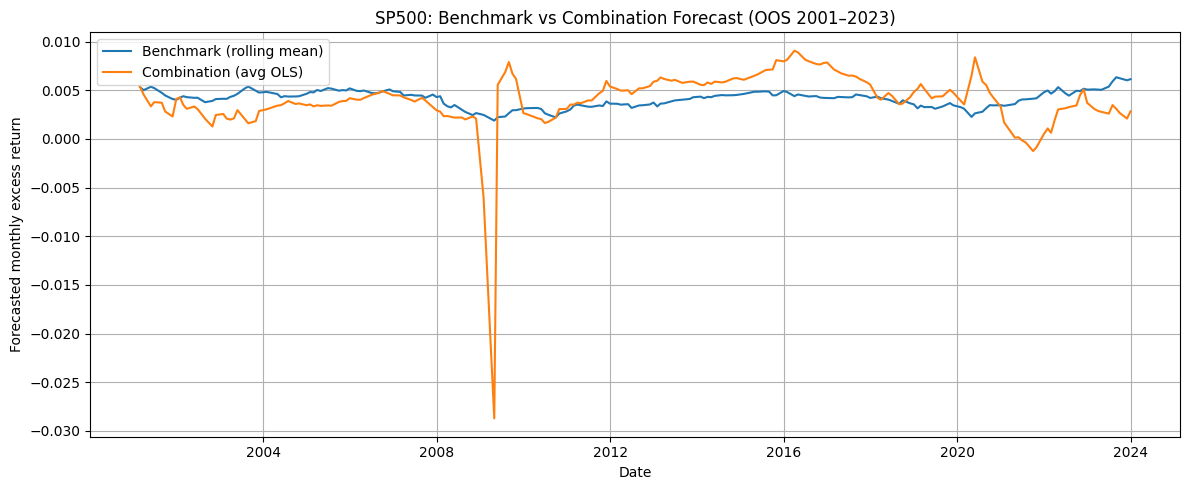

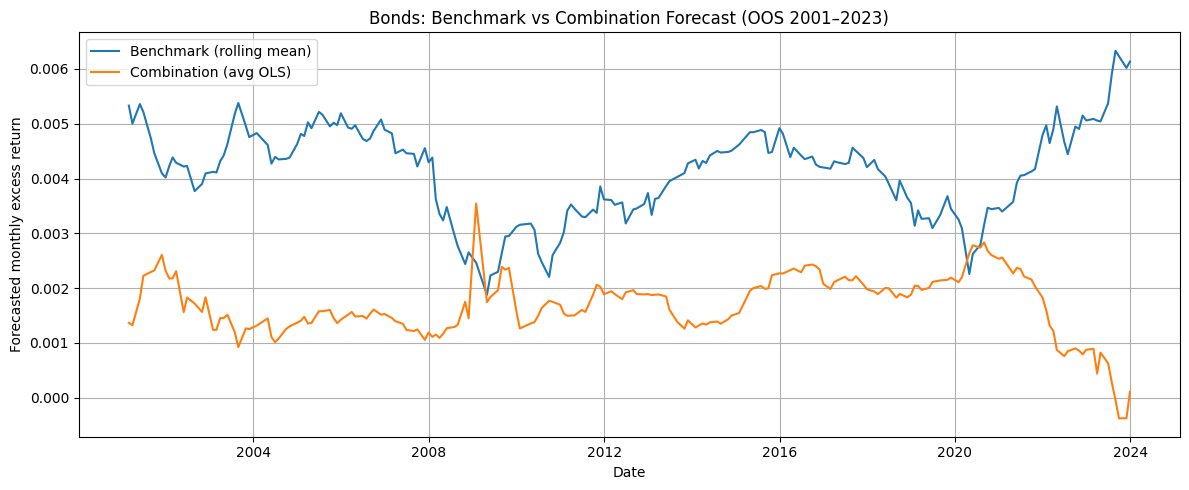

In [30]:
#create a figure showing the time-series of the benchmark and combination forecasts for each of the two asset classes

#nice plotting with mathplot lib
#to be fair - Chat GPT helped


def plot_bench_vs_combo(bench, combo, title):
    df = pd.concat([bench.rename("Benchmark"), combo.rename("Combination")], axis=1).dropna()

    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["Benchmark"], label="Benchmark (rolling mean)")
    plt.plot(df.index, df["Combination"], label="Combination (avg OLS)")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Forecasted monthly excess return")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_bench_vs_combo(benchmark_forecast_sp500, el_combo_sp500,"SP500: Benchmark vs Combination Forecast (OOS 2001–2023)")

plot_bench_vs_combo(benchmark_forecast_bonds, el_combo_bond,"Bonds: Benchmark vs Combination Forecast (OOS 2001–2023)")


In [329]:
#had to adjust dataset since - this can be deleted

#print(maroonno5.loc["2001-01-01":"2023-12-31"].isna().sum())
#print("Combo non-NaN:", el_combo_sp500.notna().sum())
#for k, fc in ols_sp500.items(): print(k, fc.notna().sum())

In [330]:
#discussion of results
#tbd

In [31]:
#Generate the out-of-sample forecasts of the (2-by-2) sample variance-covariance matrix for a portfolio of the two asset classes using the same rolling window estimation approach

#task 4

def le_role_cov_forecast(any_excess_sp500, any_excess_bonds, split):

    insample_period_sp500, outofsample_sp500 = split(excess_sp500)

    insample_period_bonds, outofsample_bonds = split(excess_bi)

    #same length for sp/bonds
    calc_window = len(insample_period_sp500)

    sp500_data = pd.concat([insample_period_sp500, outofsample_sp500])

    bond_data = pd.concat([insample_period_bonds, outofsample_bonds])

    #fullsample concatenation

    full_sample = pd.concat([sp500_data,bond_data], axis = 1)

    full_sample.columns = ["SP500", "Bonds"]

    cov_forecast = {}


    #corrected with AI - bad mistake here since I went through the wrong set (first did not full window length
    for i in outofsample_sp500.index:
        #substraction of one month t-1
        training_end = i -pd.offsets.MonthEnd(1)

        window_returns = full_sample.loc[:training_end].tail(calc_window)

        if window_returns.dropna().shape[0] < calc_window:
            cov_forecast[i] = np.nan * np.ones((2,2))
        else:
            cov_forecast[i] = window_returns.cov().values

    return cov_forecast


In [32]:
#check if results are correct for covariance

results_cov_forecasts = le_role_cov_forecast(excess_sp500, excess_bi, split)

print(results_cov_forecasts)


{Timestamp('2001-01-31 00:00:00'): array([[0.00192285, 0.00024597],
       [0.00024597, 0.00034038]]), Timestamp('2001-02-28 00:00:00'): array([[0.00191732, 0.00025402],
       [0.00025402, 0.00033387]]), Timestamp('2001-03-30 00:00:00'): array([[0.00195681, 0.00024804],
       [0.00024804, 0.00031375]]), Timestamp('2001-04-30 00:00:00'): array([[0.00192193, 0.00024187],
       [0.00024187, 0.00031293]]), Timestamp('2001-05-31 00:00:00'): array([[0.001938  , 0.00022982],
       [0.00022982, 0.00027535]]), Timestamp('2001-06-29 00:00:00'): array([[0.00193366, 0.00022502],
       [0.00022502, 0.00027009]]), Timestamp('2001-07-31 00:00:00'): array([[0.00193699, 0.0002246 ],
       [0.0002246 , 0.0002697 ]]), Timestamp('2001-08-31 00:00:00'): array([[0.00192638, 0.00022963],
       [0.00022963, 0.00026752]]), Timestamp('2001-09-28 00:00:00'): array([[0.00194682, 0.00022714],
       [0.00022714, 0.00025954]]), Timestamp('2001-10-31 00:00:00'): array([[0.0019775 , 0.00022621],
       [0.0002

In [33]:
#task 5

#Using the benchmark excess return forecasts on the two assets and the sample variance-covariance matrix forecasts, construct out-of-sample optimal portfolio weights for a mean-variance investor

#variable declaration

#clean realized returns
total_realized_returns = pd.concat([excess_sp500, excess_bi], axis = 1)
total_realized_returns.columns =["SP500","Bonds"]
total_realized_returns = total_realized_returns.sort_index()

#results 2x2 cov forecast dataframe/ matrices
data_frame_cov = results_cov_forecasts
print(data_frame_cov)

{Timestamp('2001-01-31 00:00:00'): array([[0.00192285, 0.00024597],
       [0.00024597, 0.00034038]]), Timestamp('2001-02-28 00:00:00'): array([[0.00191732, 0.00025402],
       [0.00025402, 0.00033387]]), Timestamp('2001-03-30 00:00:00'): array([[0.00195681, 0.00024804],
       [0.00024804, 0.00031375]]), Timestamp('2001-04-30 00:00:00'): array([[0.00192193, 0.00024187],
       [0.00024187, 0.00031293]]), Timestamp('2001-05-31 00:00:00'): array([[0.001938  , 0.00022982],
       [0.00022982, 0.00027535]]), Timestamp('2001-06-29 00:00:00'): array([[0.00193366, 0.00022502],
       [0.00022502, 0.00027009]]), Timestamp('2001-07-31 00:00:00'): array([[0.00193699, 0.0002246 ],
       [0.0002246 , 0.0002697 ]]), Timestamp('2001-08-31 00:00:00'): array([[0.00192638, 0.00022963],
       [0.00022963, 0.00026752]]), Timestamp('2001-09-28 00:00:00'): array([[0.00194682, 0.00022714],
       [0.00022714, 0.00025954]]), Timestamp('2001-10-31 00:00:00'): array([[0.0019775 , 0.00022621],
       [0.0002

In [34]:
#function for weights and portfolio excess return

#risk aversion for discussion - 3 or 2-5 usually

def weights_and_portfolioreturn(expect_return, rolling_cov_forecast, realized_excess, risk_aversion =3):

    expect_return = expect_return.copy().sort_index()

    #next return same index
    next_return = realized_excess.shift(-1).reindex(expect_return.index)

    #for results storage
    weight_list = []
    return_port_list = []

    #iterate through all expected returns:

    for i in expect_return.index:
        expect_return_t = expect_return.loc[i].values.astype(float)

        sigma_t = rolling_cov_forecast.get(i,None)

        if sigma_t is None or np.any(np.isnan(sigma_t)) or np.any(np.isnan(expect_return_t)):
            w = np.array([np.nan, np.nan])
            rp = np.nan
        else:
            try:
                w = (1/risk_aversion) * (np.linalg.inv(sigma_t) @ expect_return_t)

                # return for t+1
                returnt1 = next_return.loc[i].values.astype(float)
                rp = float(w @ returnt1) if np.any(np.isnan(returnt1)) else float(w @ returnt1)

            except np.linalg.LinAlgError:
                w = np.array([np.nan, np.nan])
                rp = np.nan

        weight_list.append(w)
        return_port_list.append(rp)

    weights = pd.DataFrame(weight_list, index=expect_return.index, columns=["w_SP500", "w_Bonds"])
    port_ret = pd.Series(return_port_list, index=expect_return.index, name="Return_portfolio_excess")

    return weights, port_ret

In [35]:
#benchmark portfolio expected return from benchmark forecasts

expected_return_bench = pd.concat([benchmark_forecast_sp500, benchmark_forecast_bonds], axis=1)
expected_return_bench.columns = ["SP500", "Bonds"]

print(expected_return_bench)

               SP500     Bonds
Dates                         
2001-01-31  0.005411  0.005411
2001-02-28  0.005330  0.005330
2001-03-30  0.005002  0.005002
2001-04-30  0.005182  0.005182
2001-05-31  0.005358  0.005358
...              ...       ...
2023-08-31  0.006332  0.006332
2023-09-29  0.006230  0.006230
2023-10-31  0.006462  0.006462
2023-11-30  0.006018  0.006018
2023-12-29  0.006133  0.006133

[276 rows x 2 columns]


In [36]:
#combo expected return sp500 and bonds

expected_return_combo = pd.concat([el_combo_sp500, el_combo_bond], axis=1)
expected_return_combo.columns = ["SP500", "Bonds"]

print(expected_return_combo)


               SP500     Bonds
Dates                         
2001-01-31       NaN       NaN
2001-02-28  0.005382  0.001367
2001-03-30  0.004581  0.001324
2001-04-30       NaN       NaN
2001-05-31  0.003344  0.001807
...              ...       ...
2023-08-31  0.003094 -0.000048
2023-09-29  0.002667 -0.000375
2023-10-31       NaN       NaN
2023-11-30  0.002088 -0.000373
2023-12-29  0.002827  0.000107

[276 rows x 2 columns]


In [37]:
#risk aversion = 3 since it is between 2-5 usually - but tbd

w_bench, rp_bench = weights_and_portfolioreturn(expected_return_bench, results_cov_forecasts, total_realized_returns, risk_aversion=3)
w_combo, rp_combo = weights_and_portfolioreturn(expected_return_combo, results_cov_forecasts, total_realized_returns, risk_aversion=3)

print(w_bench)
print(w_combo)

             w_SP500    w_Bonds
Dates                          
2001-01-31  0.286690   5.092010
2001-02-28  0.246467   5.134321
2001-03-30  0.198297   5.157262
2001-04-30  0.226103   5.345414
2001-05-31  0.169132   6.345564
...              ...        ...
2023-08-31  0.561041  15.688060
2023-09-29  0.537491  15.451984
2023-10-31  0.468351  15.647473
2023-11-30  0.408217  14.395024
2023-12-29  0.343021  14.051599

[276 rows x 2 columns]
             w_SP500   w_Bonds
Dates                         
2001-01-31       NaN       NaN
2001-02-28  0.839424  0.726104
2001-03-30  0.669210  0.877245
2001-04-30       NaN       NaN
2001-05-31  0.350491  1.894819
...              ...       ...
2023-08-31  0.564284 -0.408138
2023-09-29  0.517626 -1.218216
2023-10-31       NaN       NaN
2023-11-30  0.440315 -1.190348
2023-12-29  0.520429 -0.116427

[276 rows x 2 columns]


In [38]:
#statistics

#rp = return portfolio

#m = mean
# standard dev = std
def ann_port_stats(rp, periods=12):
    rp = rp.dropna()
    m = rp.mean()
    sharpi = rp.std(ddof=1)

    return pd.Series({
        "Annualized Mean": m * periods,
        "Annualized Standard Deviation": sharpi * np.sqrt(periods),
        "Annualized Sharpe Ratio": (m * periods) / (sharpi * np.sqrt(periods)) if sharpi > 0 else np.nan
    })

port_table = pd.DataFrame({
    "Benchmark": ann_port_stats(rp_bench),
    "Combination": ann_port_stats(rp_combo)}).T

display(port_table.style.format("{:.4f}"))

,Annualized Mean,Annualized Standard Deviation,Annualized Sharpe Ratio
Benchmark,0.1931,0.5308,0.3639
Combination,0.1491,0.2089,0.7138


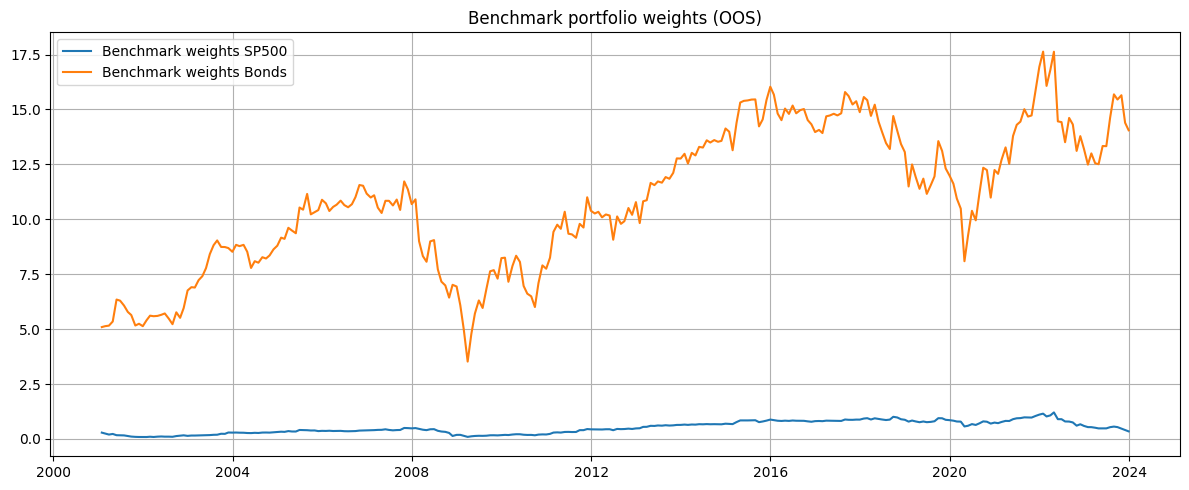

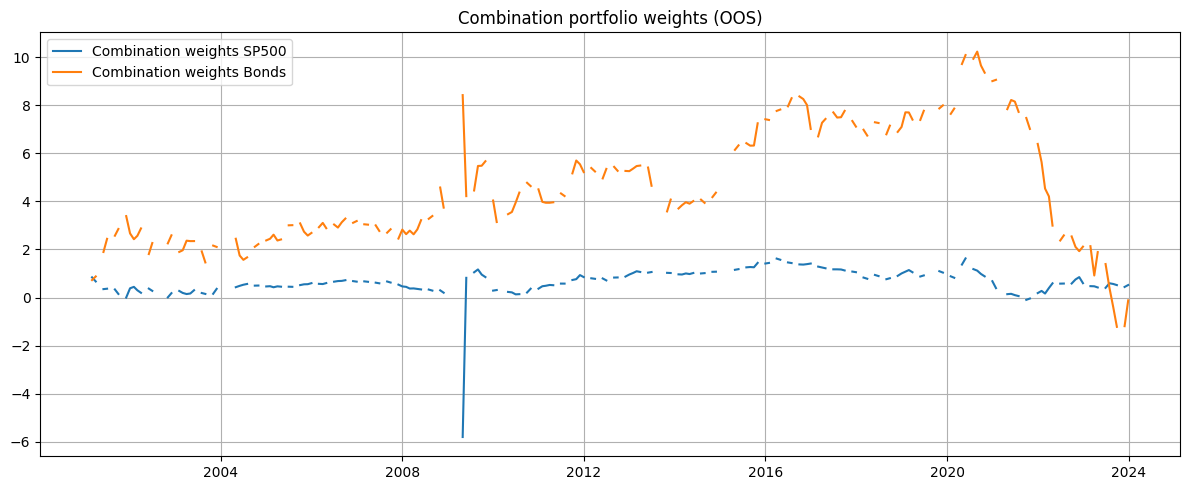

In [39]:
#plot results

plt.figure(figsize=(12,5))
plt.plot(w_bench.index, w_bench["w_SP500"], label="Benchmark weights SP500")
plt.plot(w_bench.index, w_bench["w_Bonds"], label="Benchmark weights Bonds")
plt.title("Benchmark portfolio weights (OOS)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,5))
plt.plot(w_combo.index, w_combo["w_SP500"], label="Combination weights SP500")
plt.plot(w_combo.index, w_combo["w_Bonds"], label="Combination weights Bonds")
plt.title("Combination portfolio weights (OOS)")

plt.grid(True);
plt.legend();
plt.tight_layout();
plt.show()

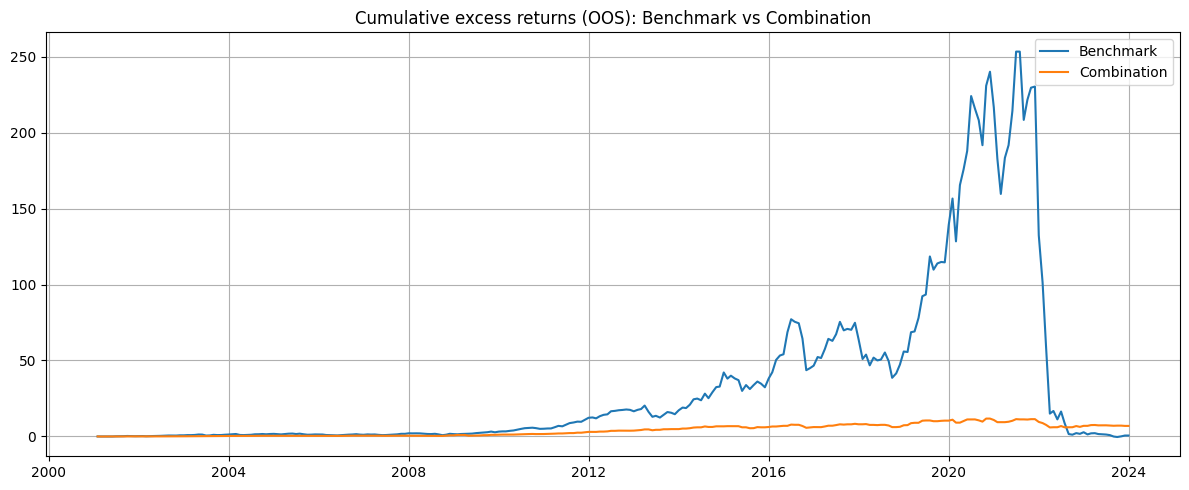

In [40]:
def cum_excess(return_p):
    return (1 + return_p.fillna(0)).cumprod() - 1

#plott
plt.figure(figsize=(12,5))
plt.plot(cum_excess(rp_bench), label="Benchmark")
plt.plot(cum_excess(rp_combo), label="Combination")
plt.title("Cumulative excess returns (OOS): Benchmark vs Combination")
plt.grid(True);
plt.legend();
plt.tight_layout();
plt.show()